In [1]:
# Import depedencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced


# Read the CSV and Perform Basic Data Cleaning

In [2]:
#Load data
file_path = Path('../Final_Project_Resources/final.csv')
df = pd.read_csv (file_path)
df.head()



,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean


In [ ]:
# RAW GDP was converted into log10(GDP) this would be considered as preliminary feature engineering
# Converting to log10(GDP) makes the data more manageable as raw GDP's are spread accross 3-orders of magnitude

In [3]:
# Converting raw GDP to log10 scale
df['GDP_log10'] = np.log10(df['GDP'])

In [4]:
# Checking if the log10(GDP) column was added
df.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand,11.954322
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean,12.206213
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America,12.148268
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean,11.187343


In [5]:
# Checking how the data in the dataframe looks like
df.describe()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,country_code,GDP_log10
count,9.200000e+02,9.200000e+02,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000
mean,1.393870e+04,5.331433e+03,3.567609,2010.279348,3.070198,26113.144578,1.342889e+12,438.443478,11.678427
std,2.225534e+05,8.499408e+04,1.517102,4.525734,3.220871,22923.009189,2.847060e+12,258.334203,0.576048
min,2.040000e+00,1.000000e+00,0.800000,2000.000000,-14.758545,970.941956,2.229865e+10,32.000000,10.348279
25%,4.675000e+00,1.000000e+00,2.497500,2007.000000,1.601224,7495.754301,2.108129e+11,188.000000,11.323895
50%,1.395000e+01,5.000000e+00,3.330000,2012.000000,2.850864,14771.257645,3.945133e+11,416.000000,11.596062
75%,8.550000e+01,3.825000e+01,4.290000,2014.000000,4.789940,46498.842667,1.041007e+12,682.000000,12.017448
max,4.000000e+06,1.600500e+06,11.250000,2016.000000,25.162533,92121.421135,1.784427e+13,858.000000,13.251499


In [ ]:
# Using Linear Regression Model using raw GDP

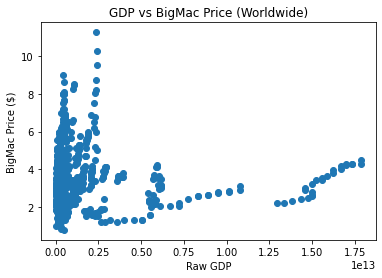

In [15]:
# Ploting the data as a scatter plot using GDP
plt.scatter(df.GDP, df.dollar_price)
plt.xlabel('Raw GDP')
plt.ylabel('BigMac Price ($)')
plt.title('GDP vs BigMac Price (Worldwide)')
plt.show()

In [7]:
# Defining raw GDP as the independant variable (feature)
X =df.GDP.values.reshape(-1,1)

In [8]:
# Defining dollar_price of BigMac as the dependant variable(target)
y= df.dollar_price.values.reshape(-1,1)

In [66]:
# scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [10]:
# Instantiate linear regression model
model = LinearRegression()

In [11]:
# training the model
model.fit(X,y)

LinearRegression()

In [12]:
y_pred = model.predict(X)

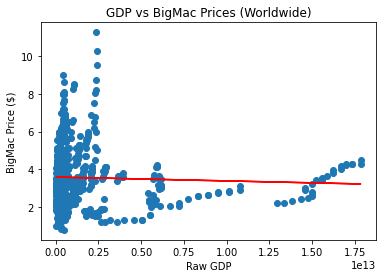

In [14]:
# Scatter plot including the regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('GDP vs BigMac Prices (Worldwide)')
plt.xlabel('Raw GDP')
plt.ylabel('BigMac Price ($)')
plt.show()

In [16]:
# Printing coefficient and y-intercept
print(model.coef_)
print(model.intercept_)

[[-2.0387791e-14]]
[3.59498724]


In [17]:
# R-square for the model
print(model.score(X,y))

0.001463875238819301


# Using 2nd Polynomial

In [78]:
# Import dependencies
from sklearn.preprocessing import PolynomialFeatures

# Save an instance of Polynomial Feature
poly = PolynomialFeatures(degree=2, include_bias=True)

In [79]:
poly_features = poly.fit_transform(X.reshape(-1,1))

In [80]:
y

array([[ 2.5 ],
       [ 2.59],
       [ 2.95],
       [ 2.85],
       [ 2.45],
       [ 1.24],
       [ 1.39],
       [ 3.09],
       [ 1.22],
       [ 1.83],
       [ 3.62],
       [ 2.77],
       [ 1.51],
       [ 2.32],
       [ 1.7 ],
       [ 1.38],
       [ 3.2 ],
       [ 1.5 ],
       [ 3.  ],
       [ 5.9 ],
       [ 1.45],
       [ 2.24],
       [ 2.5 ],
       [ 3.  ],
       [ 1.8 ],
       [ 3.33],
       [ 2.1 ],
       [ 1.24],
       [ 1.44],
       [ 3.09],
       [ 1.32],
       [ 1.35],
       [ 2.37],
       [ 1.51],
       [ 2.43],
       [ 1.8 ],
       [ 1.18],
       [ 1.48],
       [ 3.3 ],
       [ 1.21],
       [ 2.4 ],
       [ 6.3 ],
       [ 1.22],
       [ 2.24],
       [ 0.83],
       [ 3.  ],
       [ 1.8 ],
       [ 3.33],
       [ 2.14],
       [ 1.31],
       [ 1.66],
       [ 3.09],
       [ 1.69],
       [ 1.7 ],
       [ 3.  ],
       [ 2.02],
       [ 1.68],
       [ 2.43],
       [ 1.8 ],
       [ 4.38],
       [ 2.83],
       [ 1.27],
       [

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [82]:
poly_reg_model = LinearRegression()

In [83]:
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_predicted = poly_reg_model.predict(X_test)
y_predicted

array([[3.59481641],
       [3.59263039],
       [3.44302251],
       [3.58980617],
       [3.59456628],
       [3.57532161],
       [3.59184225],
       [3.59128964],
       [3.59737746],
       [3.58512095],
       [3.58932407],
       [3.59215906],
       [3.59026285],
       [3.59560396],
       [3.43771641],
       [3.59142489],
       [3.58698171],
       [3.58985946],
       [3.59000781],
       [3.59991429],
       [3.58895988],
       [3.59469086],
       [3.59474403],
       [3.59637091],
       [3.53710671],
       [3.59659312],
       [3.58926396],
       [3.59664677],
       [3.59542903],
       [3.59552684],
       [3.45586566],
       [3.58963278],
       [3.59224577],
       [3.50292852],
       [3.54276434],
       [3.59613594],
       [3.45668871],
       [3.58741764],
       [3.59555136],
       [3.5894539 ],
       [3.58489087],
       [3.54509455],
       [3.57618985],
       [3.58437629],
       [3.44551457],
       [3.59998932],
       [3.58961832],
       [3.596

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
poly_reg_rmse = np.sqrt(mean_squared_error(y_test,
                                          y_predicted))
poly_reg_rmse

1.4885154627642792

In [27]:
# plt.figure(figsize= (10,6))
# plt.title("Polynomial Reg", size=16)
# plt.scatter(X, y)
# plt.plot(X, y_predicted, c='red')
# plt.show()

# Lets try RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [88]:
X =df.GDP.values.reshape(-1,1)
y= df.dollar_price

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [90]:
# Creating a StandardScalar instance
scaler = StandardScaler()

# Fitting the Standard Scalar with the training data
X_scalar = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scalar.transform(X_train)
X_test_scaled = X_scalar.transform(X_test)

In [91]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=0)

In [92]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [93]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [94]:
# Calculating the accuracy score
mse = mean_squared_error(y_test, predictions)

rmse = mse**0.5

print(mse)
print(rmse)

2.403143672579611
1.5502076224104986
